In [6]:
%load_ext autoreload
%autoreload 2
%pylab inline
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:90% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [7]:
import sys
sys.path.insert(0, '../')

import numpy as np
import tensorflow as tf
import os, sys, time, pickle, functools
import data, utils
from PIL import Image
from skimage import io
import plot
from plot import get_animation, save_animation

In [8]:
fwd = data.fmap.medical_forward
bkd = data.fmap.medical_backward

In [9]:
path = '../../../Electron_Microscopy_Dataset/volumedata.tif' #volumedata.tif training.tif
arr = io.imread(path)

In [10]:
print(arr.shape)
print(type(arr[0,0,0]))

(1065, 1536, 2048)
<class 'numpy.uint8'>


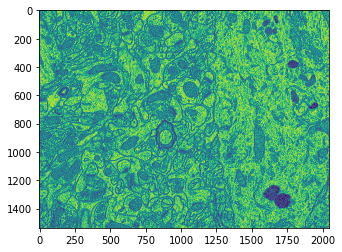

In [11]:
plt.imshow(arr[1,])

In [12]:
print(np.max(arr))
print(np.min(arr))

255
1


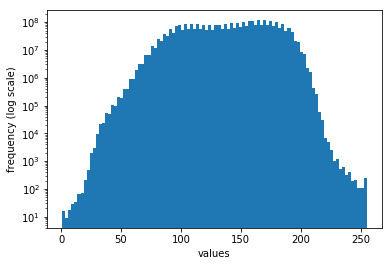

In [13]:
plt.hist(arr.flatten(), 100)
plt.xlabel('values')
plt.ylabel('frequency (log scale)')
plt.yscale('log')

In [14]:
plt.imshow(cubes[0, 100])

NameError: name 'cubes' is not defined

# Generate dataset 

In [52]:
print(arr.shape)
print(type(arr[0,0,0]))

(1065, 1536, 2048)
<class 'numpy.uint8'>


In [53]:
arr = np.expand_dims(arr, axis=0)

In [54]:
cubes = data.Dataset.slice_3d(arr, spix=256)

In [55]:
print(cubes.shape)
print(len(cubes))

(192, 256, 256, 256)
192


In [56]:
rootpath = data.path.medical_path()
for i in range(0, 10):
        utils.save_hdf5(data=cubes[i, :, :, :], filename=rootpath + str(i) + '.h5', dtype=np.float32)

In [27]:
# verify whether correctly written
ans = True
for i in range(0, len(cubes)):
    im = utils.load_hdf5(rootpath + str(i) + '.h5')
    ans = ans and np.all(im == cubes[i,])
print(ans)

True


# Visualize 3d images

# 0->32

In [63]:
dataset_32 = data.load.load_medical_dataset(spix=32, resolution=256, scaling=8, augmentation=False, shuffle=False, forward_map=fwd, patch=False, is_3d=True)
real_32 = dataset_32.get_all_data()
real_32_raw = bkd(real_32)
print("medical dataset_32 shape: ", np.shape(real_32))

Number of histograms=10
Loaded 5 histograms for iterator _get_total_num_samples!
Loaded 5 histograms for iterator _get_total_num_samples!
medical dataset_32 shape:  (10, 32, 32, 32)


 97%|█████████▋| 32/33 [00:04<00:00,  7.57it/s]


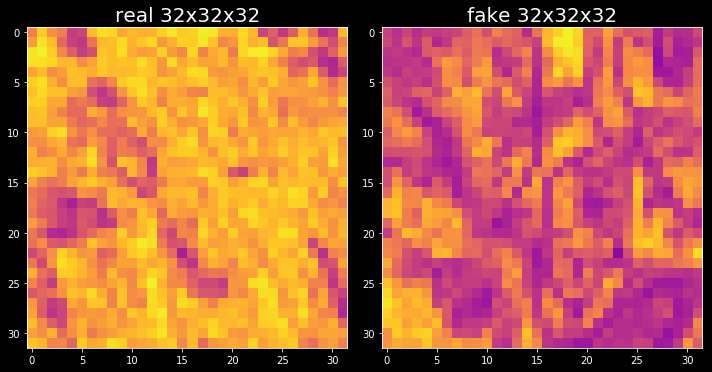

In [64]:
animation = get_animation(real_32[0,], real_32[5,], figsize=(10, 10), fps=8)
animation.ipython_display(fps=8, loop=True, autoplay=True)
#save_animation(real_cube_32, fake_cube_32, figsize=(30, 20), fps=16, format='mp4', output_file_name='Samples/final/32_32_32_log_norm/0th_32_27k.mp4',  fontsize=40)

# 32->64

In [65]:
dataset_64 = data.load.load_medical_dataset(spix=64, resolution=256, scaling=4, augmentation=False, shuffle=False, forward_map=fwd, patch=False, is_3d=True)
real_64 = dataset_64.get_all_data()
real_64_raw = bkd(real_64)
print("medical dataset_64 shape: ", np.shape(real_64))

Number of histograms=10
Loaded 5 histograms for iterator _get_total_num_samples!
Loaded 5 histograms for iterator _get_total_num_samples!
medical dataset_64 shape:  (10, 64, 64, 64)


 98%|█████████▊| 64/65 [00:07<00:00,  8.48it/s]


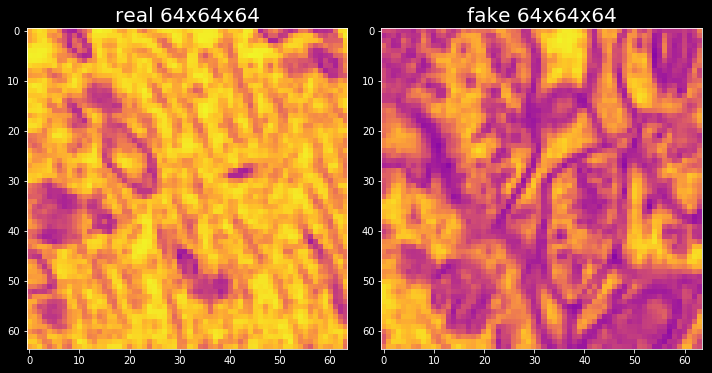

In [66]:
animation = get_animation(real_64[0,], real_64[5,], figsize=(10, 10), fps=16)
animation.ipython_display(fps=16, loop=True, autoplay=True)
#save_animation(real_cube_32, fake_cube_32, figsize=(30, 20), fps=16, format='mp4', output_file_name='Samples/final/32_32_32_log_norm/0th_32_27k.mp4',  fontsize=40)

# 64->256

In [61]:
dataset_256 = data.load.load_medical_dataset(spix=256, resolution=256, scaling=1, augmentation=False, shuffle=False, forward_map=fwd, patch=False, is_3d=True)
real_256 = dataset_256.get_all_data()
real_256_raw = bkd(real_256)
print("medical dataset_256 shape: ", np.shape(real_256))

Number of histograms=10
Loaded 5 histograms for iterator _get_total_num_samples!
Loaded 5 histograms for iterator _get_total_num_samples!
medical dataset_256 shape:  (10, 256, 256, 256)


[MoviePy] >>>> Building video Samples/medical/real_256.mp4
[MoviePy] Writing video Samples/medical/real_256.mp4


100%|█████████▉| 256/257 [01:08<00:00,  3.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Samples/medical/real_256.mp4 



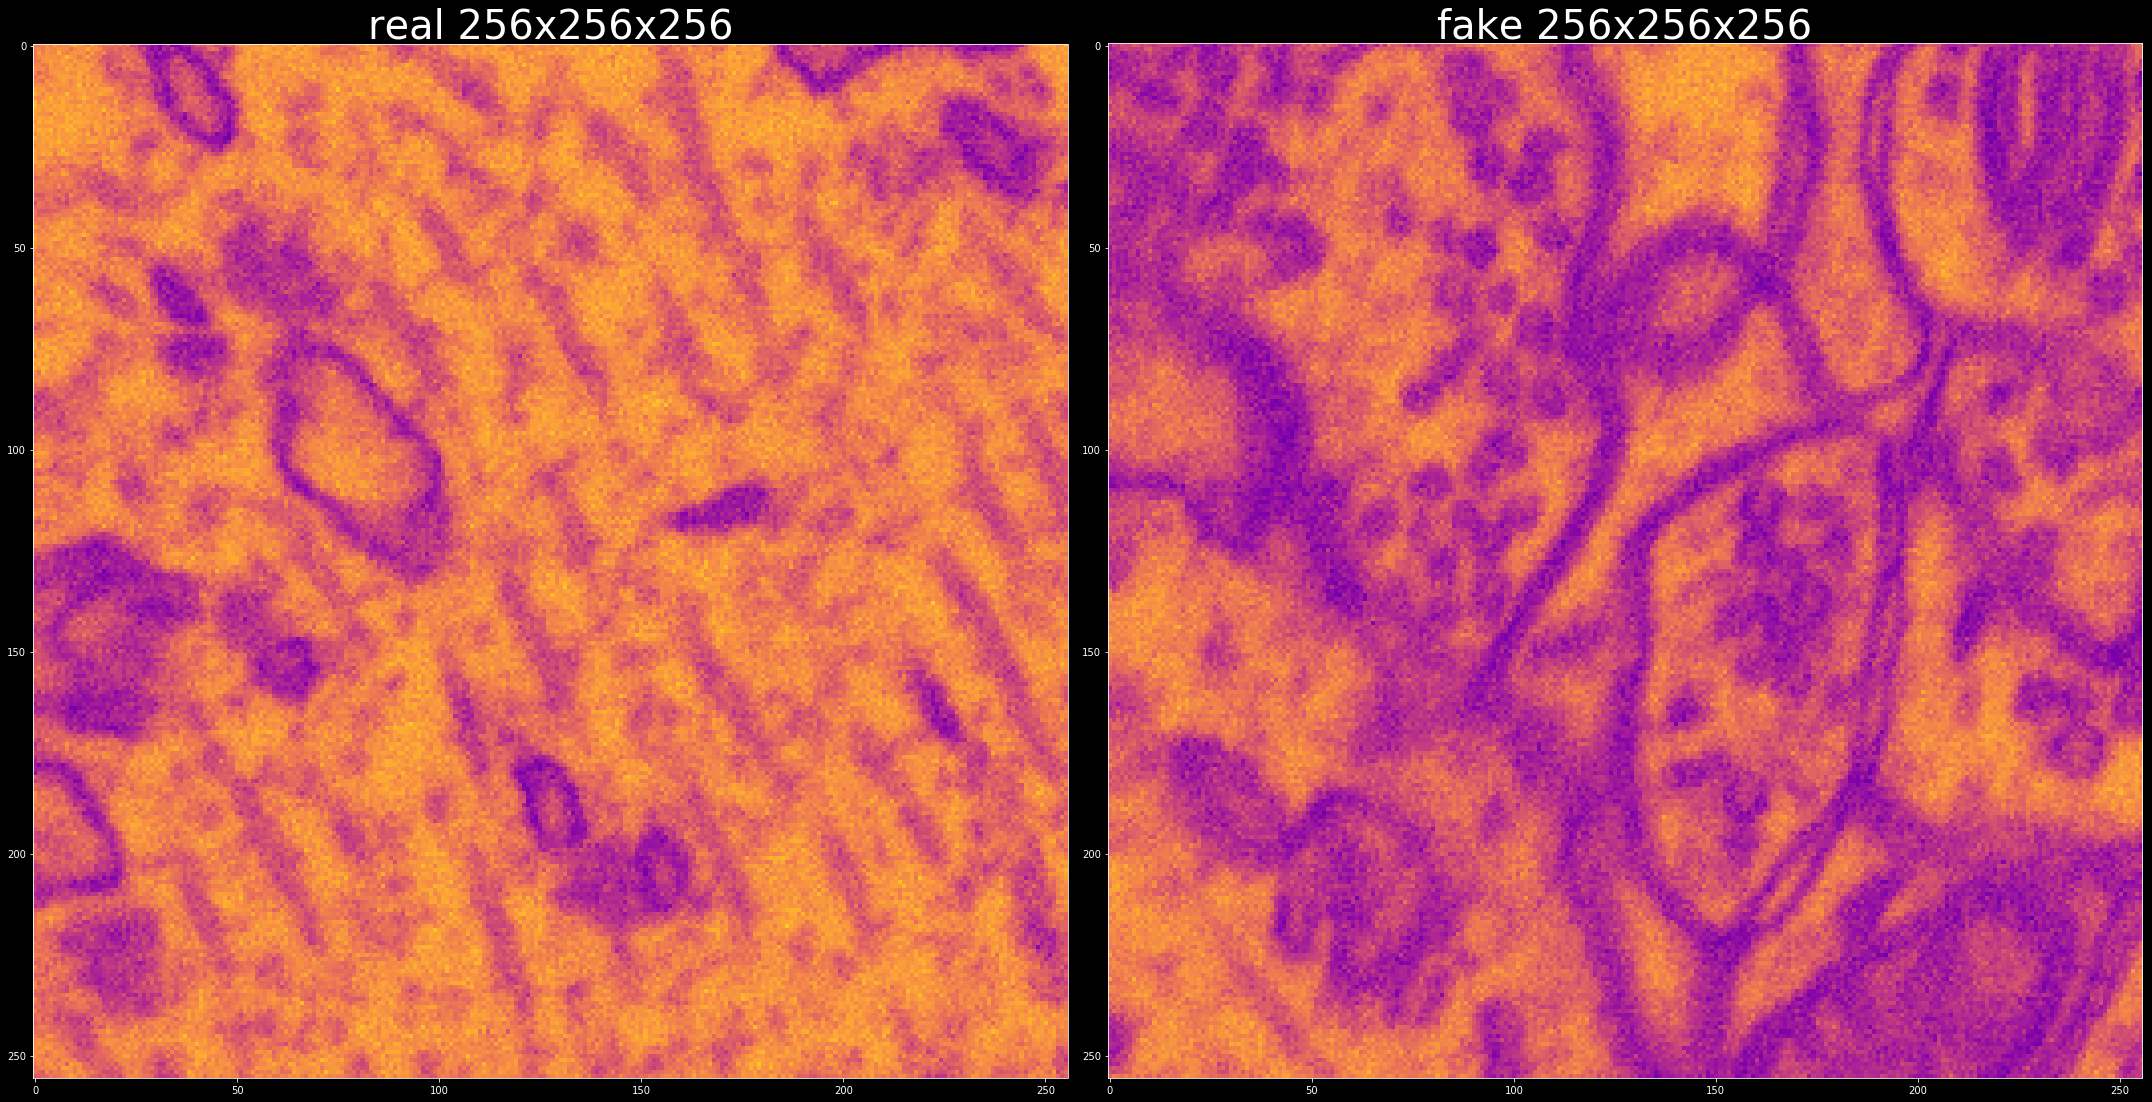

In [62]:
save_animation(real_256[0,], real_256[5,], figsize=(30, 20), fps=16, format='mp4', output_file_name='Samples/medical/real_256.mp4',  fontsize=40)